In [7]:
import os
import pandas as pd

csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [8]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news'][0]

'파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 일 관내 취약계층 만가구에 대해 정부 긴급재난지원금 입금을 완료했다파주시민이 받는 긴급재난지원금은 인 이상 가구 기준으로 만원을 받게 되며 인 가구는 만원 인 가구 만원 인 가구 만원이다정부가 발표한 긴급재난지원금이 파주시민에게 지급한 금액과 다른 이유는 국비지방비 부담 비율 때문이다파주시는 이미 모든 시민에게 경기도파주시 재난기본소득인당 각 만원을 지급하고 있어 시민에게 국비 지원금만 지급하며 인 가구 기준으로 총 지원 금액은 파주시 재난기본소득 만원 경기도 재난기본소득 만원 정부 긴급재난지원금 만원 등 총 만원을 받게 된다취약계층이 아닌 시민은 오는 월일부터 소지하고 있는 신용체크카드사 홈페이지에서 긴급재난지원금 지원을 신청할 수 있다 세대주가 가족 지원금을 일괄 신청해야 한다한편 파주시는 일 김정기 부시장을 단장으로 하는 긴급재난지원금 추진 태스크포스를 구성해 긴급재난지원금이 원활하게 지급될 수 있도록 지원한다 저작권자  파이낸셜뉴스 무단 전재재배포 금지'

In [9]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [10]:
len(df)

60

In [11]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  53


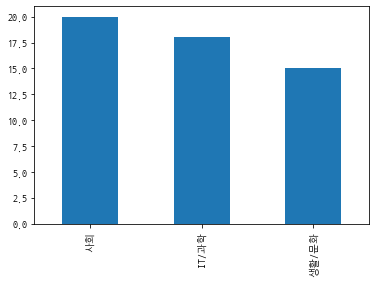

In [12]:
import matplotlib as plt
plt.rcParams["font.family"] = 'NanumGothicCoding'
df['code'].value_counts().plot(kind = 'bar')

In [13]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학     18
1     사회     20
2  생활/문화     15


In [14]:
from konlpy.tagger import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

ModuleNotFoundError: No module named 'konlpy.tagger'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)